# **Big Data Analytics [CN7031] CRWK 2021-22**
# **Group ID: 3**
1. Student 1: Yesbol GABDULLIN, u2178748
2. Student 2: Pardha Saradhi GUNDLAPALLI, u2176298
3. Student 3: Sakib AHAMMED, u2165011
4. Student 4: Maria ANTONY, u2176663
---


If you want to add comments on your group work, please write it here for us:

*N/A*


# **Initiate and Configure Spark**

---


In [ ]:
# Install pyspark in Colab
!pip install pyspark

     |████████████████████████████████| 281.3 MB 35 kB/s 
     |████████████████████████████████| 198 kB 39.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=d88867609a5043fd650951c079da2a19929eb3b42e5b819b71742a7be845bb4e
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from google.colab import drive

# link with SparkSession
spark = SparkSession.builder.master("local[*]").appName('Group_3').getOrCreate()

# mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive



# **Load Data**

---


In [ ]:
# Load Data from Google Drive
df = spark.read.csv('/content/drive/MyDrive/archive_IDS2018/*.csv', header=True)

# Rename column names to match the names from features description file
updated_col_names = [
    'dst_port', 
    'protocol',
    'timestamp',
    'fl_dur', 
    'tot_fw_pk', 
    'tot_bw_pk', 
    'tot_l_fw_pkt', 
    'tot_l_bwd_pkt ', 
    'fw_pkt_l_max', 
    'fw_pkt_l_min', 
    'fw_pkt_l_avg', 
    'fw_pkt_l_std', 
    'Bw_pkt_l_max', 
    'Bw_pkt_l_min', 
    'Bw_pkt_l_avg', 
    'Bw_pkt_l_std', 
    'fl_byt_s', 
    'fl_pkt_s', 
    'fl_iat_avg', 
    'fl_iat_std', 
    'fl_iat_max', 
    'fl_iat_min', 
    'fw_iat_tot', 
    'fw_iat_avg', 
    'fw_iat_std', 
    'fw_iat_max', 
    'fw_iat_min', 
    'bw_iat_tot', 
    'bw_iat_avg', 
    'bw_iat_std', 
    'bw_iat_max', 
    'bw_iat_min', 
    'fw_psh_flag', 
    'bw_psh_flag', 
    'fw_urg_flag', 
    'bw_urg_flag', 
    'fw_hdr_len', 
    'bw_hdr_len', 
    'fw_pkt_s', 
    'bw_pkt_s', 
    'pkt_len_min', 
    'pkt_len_max', 
    'pkt_len_avg', 
    'pkt_len_std', 
    'pkt_len_va', 
    'fin_cnt', 
    'syn_cnt', 
    'rst_cnt', 
    'pst_cnt', 
    'ack_cnt', 
    'urg_cnt', 
    'cwe_cnt', 
    'ece_cnt', 
    'down_up_ratio', 
    'pkt_size_avg', 
    'fw_seg_avg', 
    'bw_seg_avg', 
    'fw_byt_blk_avg', 
    'fw_pkt_blk_avg', 
    'fw_blk_rate_avg', 
    'bw_byt_blk_avg', 
    'bw_pkt_blk_avg', 
    'bw_blk_rate_avg', 
    'subfl_fw_pk', 
    'subfl_fw_byt', 
    'subfl_bw_pkt', 
    'subfl_bw_byt', 
    'fw_win_byt', 
    'bw_win_byt', 
    'Fw_act_pkt', 
    'fw_seg_min', 
    'atv_avg', 
    'atv_std', 
    'atv_max', 
    'atv_min', 
    'idl_avg', 
    'idl_std', 
    'idl_max', 
    'idl_min', 
    'label'
]

df = df.toDF(*updated_col_names)


# **Task 1: Spark SQL [30 marks]**

---



In [ ]:
# Create view
df.createOrReplaceTempView("IDS_df_view")

+--------+--------------------+--------------------+---------+------------------+------------------+--------------------+---------------+
|dst_port|               label|         port_attack|frequency|  percentage_total|      mean_pkt_len|   avg_flow_duration|       sum_byts|
+--------+--------------------+--------------------+---------+------------------+------------------+--------------------+---------------+
|      80|    DDOS attack-HOIC|Port 80 - DDOS at...|   686012| 34.12808254274642|36.822822523512706|    9720.32487041043|2.7829169606E10|
|      80|    DoS attacks-Hulk|Port 80 - DoS att...|   461912|22.979438936177623| 8.078628511394761|   301755.6112874314|   4.79949453E8|
|    8080|                 Bot|     Port 8080 - Bot|   281634| 14.01087502673983|27.874913166851318|   7245.500024854953|  1.402715532E9|
|      21|      FTP-BruteForce|Port 21 - FTP-Bru...|   193354| 9.619075572978593|               0.0|   3.803314128489713|  5.197935582E9|
|      22|      SSH-Bruteforce|Por

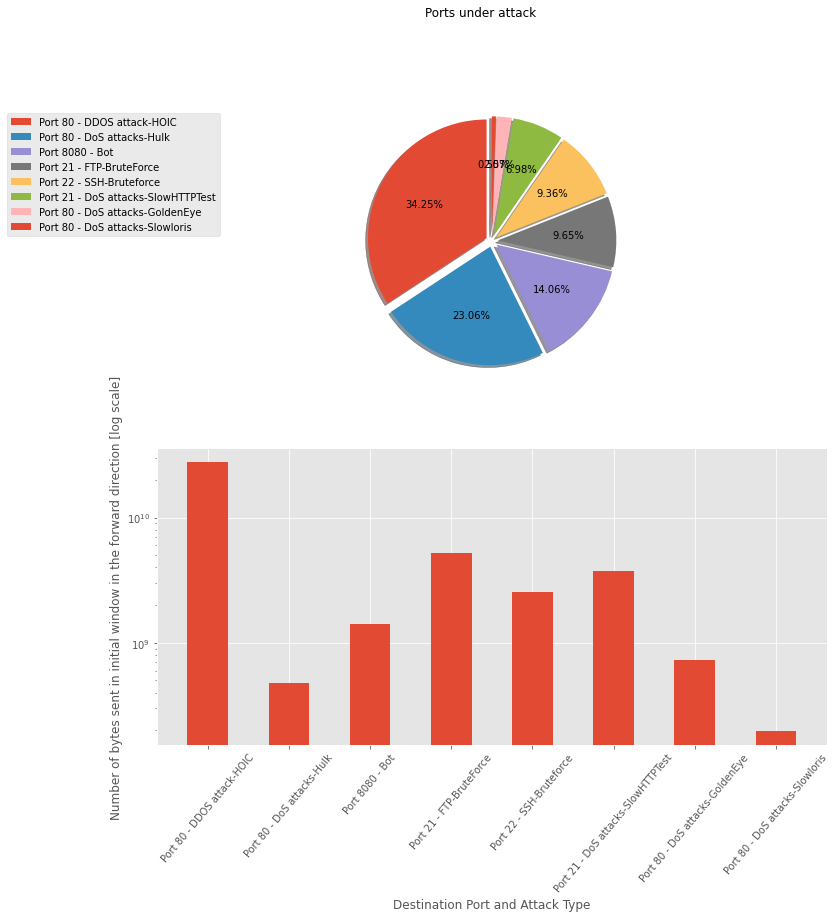

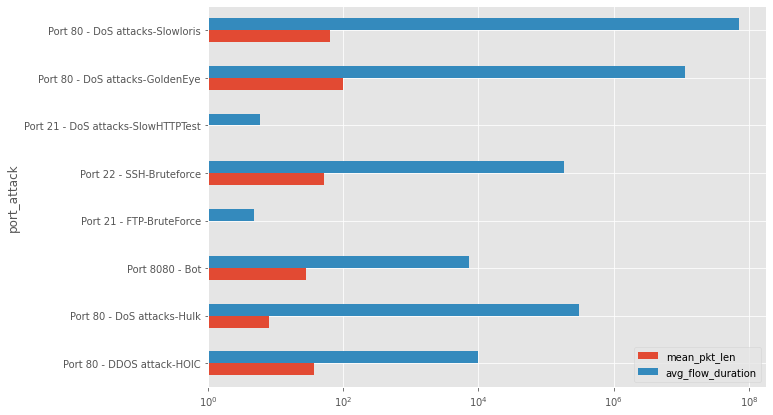

In [ ]:
# Student 1 : Yesbol Gabdullin, u2178748
# Query 1:
query_1_description = """
This query is to understand what destination ports were mostly under attack \, 
what type of attacks they were subjected to, 
how many times they were under attack, and was their characteristics \
such as average flow duration, mean packet length and sum of initially forwarded byts.
The results are filtered by frequency (count), flow duration and label type (not Benign).
Only ports that were under attack > 10000 times are shown
"""

q1 = """
  SELECT 
    dst_port,
    label,
    ARRAY_JOIN(array('Port', dst_port,'-', label), ' ') AS port_attack,
    COUNT(label) AS frequency,
    COUNT(label) * 100 / 
      (SELECT COUNT(*) FROM IDS_df_view WHERE label != "Benign") 
      AS percentage_total,
    MEAN(pkt_len_avg) mean_pkt_len,
    MEAN(fl_dur) avg_flow_duration,
    SUM(fw_win_byt) sum_byts
  FROM IDS_df_view
  WHERE 
    label != "Benign"
    AND fl_dur > 0

  GROUP BY dst_port, label
  HAVING frequency > 10000
  ORDER BY frequency DESC;

"""

sql_df1 = spark.sql(q1)
sql_df1.show()

# Visualising results of Query 1 (Yesbol Gabdullin, u2178748)

import matplotlib.pyplot as plt
df1 = sql_df1.toPandas()

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))
fig.suptitle('Ports under attack')
ax1.pie(df1['frequency'], explode=[0.05]*df1.shape[0], autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.legend(labels=df1['port_attack'], loc='lower right', bbox_to_anchor=(-0.4, .5), fontsize=10)
ax2.bar(x=df1['port_attack'], height=df1['sum_byts'], log=True, width=0.5)
plt.xlabel("Destination Port and Attack Type")
plt.ylabel("Number of bytes sent in initial window in the forward direction [log scale]")
plt.xticks(rotation=50)
plt.show()

df1.plot(x='port_attack', y=['mean_pkt_len', 'avg_flow_duration'], kind="barh", log=True, figsize=(10, 7))
plt.show()

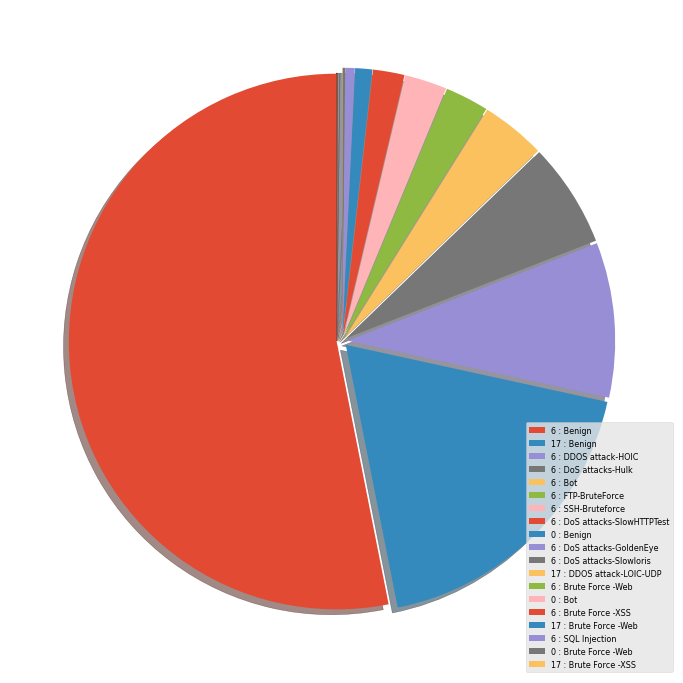

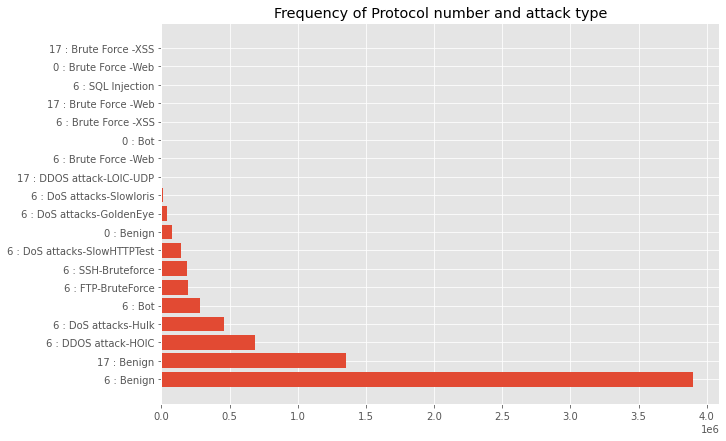

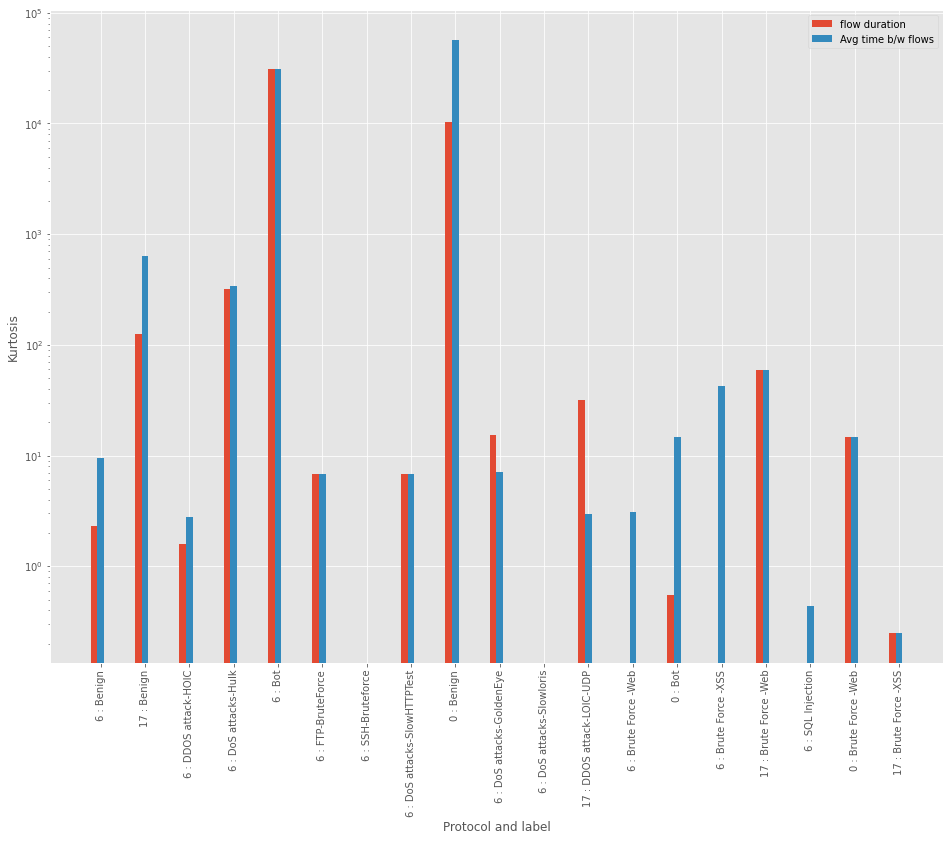

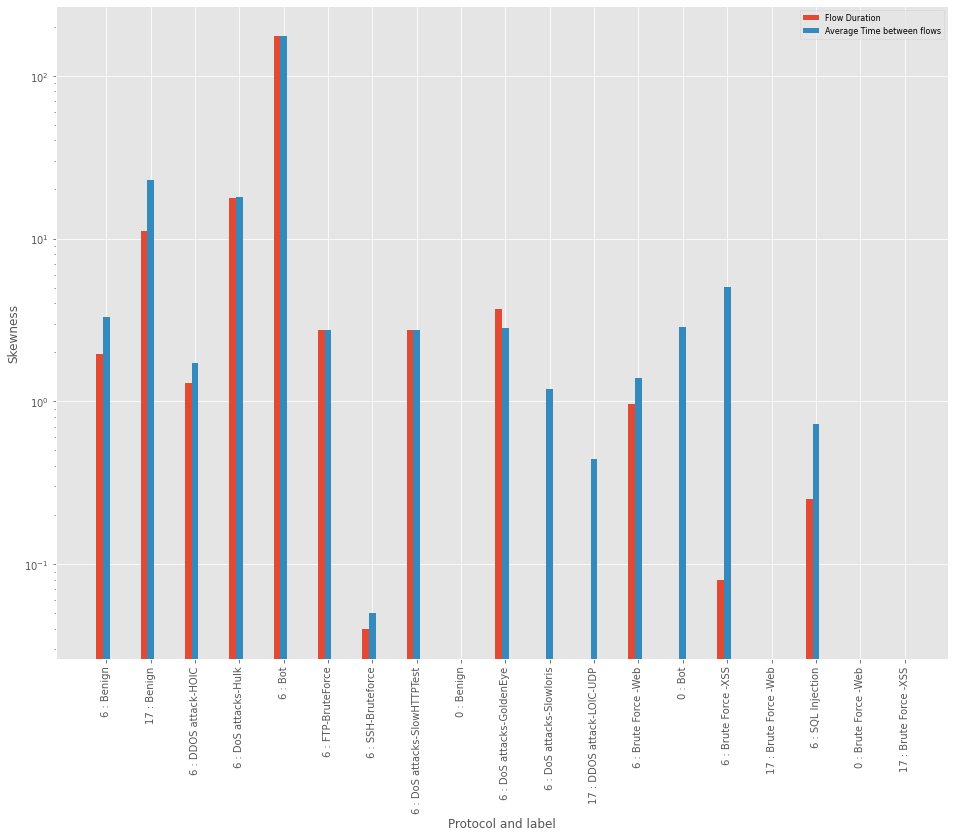

In [ ]:
# Student 1 : Yesbol Gabdullin, u2178748
# Query 2:

query_2_description = """
The purpose of this query is to understand the distribution of 2 characteristics - 
Flow duration and average time between flows - by finding kurtosis, skewness and interquartile range.
The results are grouped by label and protocol.

"""

q2 = """
  SELECT
    label,
    protocol,
    COUNT(*) frequency,
    ROUND(COUNT(*) / (SELECT COUNT(*) FROM IDS_df_view), 4)*100 AS percentage,
    array ( 
      ROUND(kurtosis(fl_dur), 2), 
      ROUND(kurtosis(fl_iat_avg), 2)
          ) 
        AS features_kurtosis,
    array ( 
      ROUND(skewness(fl_dur), 2), 
      ROUND(skewness(fl_iat_avg), 2) 
        ) 
        AS features_skewness,

    array(
      ROUND(percentile(fl_dur, 0.75) - percentile(fl_dur, 0.25)),
      ROUND(percentile(fl_iat_avg, 0.75) - percentile(fl_iat_avg, 0.25))
    ) AS features_iqr

  FROM IDS_df_view
  GROUP BY label, protocol
  ORDER BY frequency DESC

"""

sql_df2 = spark.sql(q2)
pd_df2 = sql_df2.toPandas()


# Visualising the query
import matplotlib.pyplot as plt

pd_df2['protocol_label'] = pd_df2[['protocol', 'label']].agg(' : '.join, axis=1)

plt.figure(figsize=(12, 14))
plt.pie(pd_df2['frequency'], explode=[0.02]*pd_df2.shape[0], shadow=True, startangle=90)
plt.legend(labels=pd_df2['protocol_label'], loc='lower right', fontsize=8)
plt.show()

plt.figure(figsize=(10, 7))
plt.title('Frequency of Protocol number and attack type')

plt.barh(pd_df2.protocol_label, pd_df2.frequency)
plt.show()

import numpy as np

# Visualise kurtosis
x = np.arange(pd_df2.shape[0])
y1 = [i[0] for i in pd_df2['features_kurtosis']]
y2 = [i[1] for i in pd_df2['features_kurtosis']]
width = 0.15

plt.style.use('ggplot')
plt.figure(figsize=(16, 12))   
plt.bar(x-width, y1, width, log=True)
plt.bar(x, y2, width, log=True)
plt.xticks(x, pd_df2.protocol_label, rotation=90)
plt.xlabel("Protocol and label")
plt.ylabel("Kurtosis")
plt.legend(["flow duration", "Avg time b/w flows"])
plt.show()

# Visualise skewness
x = np.arange(pd_df2.shape[0])
y1 = [i[0] for i in pd_df2['features_skewness']]
y2 = [i[1] for i in pd_df2['features_skewness']]
width = 0.15

plt.figure(figsize=(16, 12))  
plt.bar(x-width, y1, width, log=True)
plt.bar(x, y2, width, log=True)
plt.xticks(x, pd_df2.protocol_label, rotation=90)
plt.xlabel("Protocol and label")
plt.ylabel("Skewness")
plt.legend(["Flow Duration", "Average Time between flows"], fontsize=8)
plt.show()

+--------+-----------+
|    time|num_attacks|
+--------+-----------+
|10:08:06|        362|
|10:47:58|        346|
|09:27:28|        342|
|08:57:55|        335|
|11:28:57|        330|
|08:47:04|        324|
|11:15:44|        312|
|10:49:44|        312|
|10:08:07|        307|
|11:28:59|        301|
|08:47:03|        298|
|11:28:49|        295|
|11:01:53|        293|
|11:28:56|        285|
|08:47:00|        281|
|10:34:59|        278|
|08:47:10|        277|
|11:28:46|        274|
|10:34:53|        272|
|12:45:37|        269|
+--------+-----------+
only showing top 20 rows



<Figure size 21600x21600 with 0 Axes>

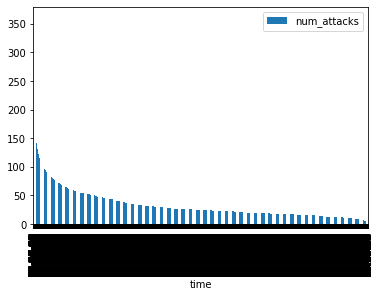

In [ ]:
# Student 2 : Gundlapalli Pardhasaradhi, u2176298
# Query 1:
'''
Business Objective:

  Finding the most of attacks based on time scale - to understand prefered attacks time
'''
sql_1 = spark.sql("SELECT RIGHT(timestamp,8) AS time,COUNT(RIGHT(timestamp,8)) AS num_attacks FROM IDS_df_view GROUP BY RIGHT(timestamp,8) ORDER BY num_attacks DESC")
sql_1.show()

# Visual Representation
pandas_df_1 = sql_1.toPandas()
plt.figure(figsize=(300,300))
pandas_df_1.sort_values(by='num_attacks',ascending=False).plot(x ='time', y='num_attacks', kind = 'bar')

+--------+--------+------+-------------+
|protocol|  fl_dur| label|flow_duration|
+--------+--------+------+-------------+
|       6|  999999|Benign|         null|
|       6|99999775|Benign|  9.8999776E7|
|       6|  999997|Benign| -9.8999778E7|
|       0|99999557|Benign|   9.899956E7|
|       6|  999995|Benign| -9.8999562E7|
|       0|99999364|Benign|  9.8999369E7|
|       6|99998976|Benign|       -388.0|
|       6|  999989|Benign| -9.8998987E7|
|       0|99998843|Benign|  9.8998854E7|
|       6|  999988|Benign| -9.8998855E7|
|       0|99998752|Benign|  9.8998764E7|
|       0|99998467|Benign|       -285.0|
+--------+--------+------+-------------+
only showing top 12 rows



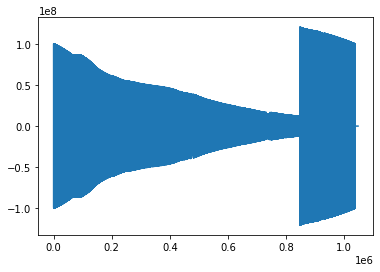

In [ ]:
# Student 2 : Gundlapalli Pardhasaradhi, u2176298
# SQL - 2
# Problem Statement
'''
Query to find differences between flow durations
'''
sql_2 = spark.sql("SELECT protocol,fl_dur,label, fl_dur - LAG (fl_dur,1) OVER (ORDER BY fl_dur DESC) AS flow_duration FROM IDS_df_view")
sql_2.show(12)

pandas_df_2 = sql_2.toPandas()
plt.plot(pandas_df_2["flow_duration"])

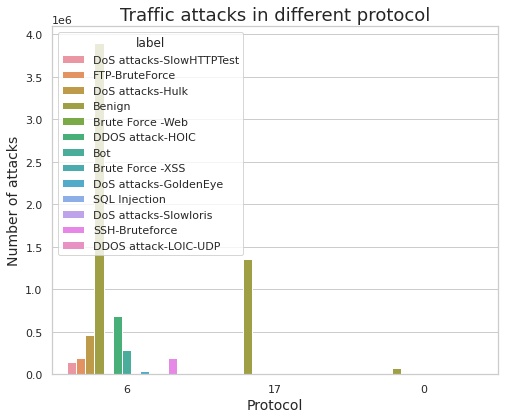

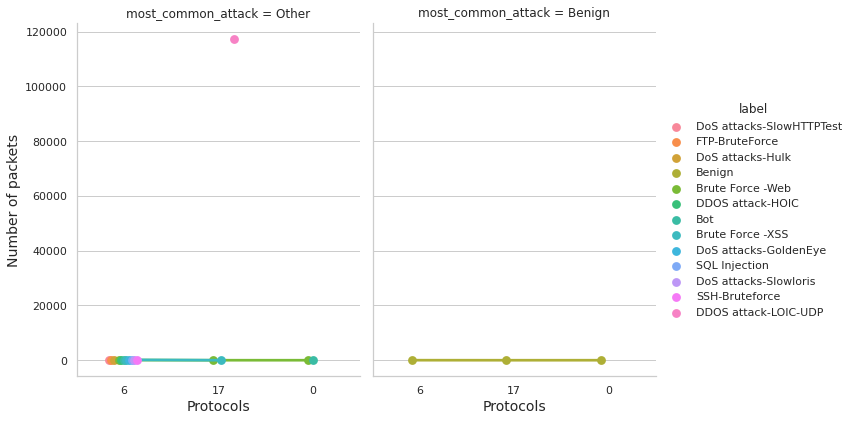

In [ ]:
# Student 3 : Name : Sakib Ahammed, ID : 2165011
# Query 1 [Briefly explain]: 
# 1. Finding the number of traffic attacks in terms of protocol - counting the number of attacks, and
#    using user define function (UDF) to indentify the most occurring attacks according to the 'protocol' and 'label'
# 2. Finding the number of packets in both direction(forward and backward) in terms of protocol according to the most common traffic attacks - 
#    calculating average packet per attack based on total packets in the forward & backward direction,
#    categorising the most common attacks using CASE statement according to the 'protocol' and 'label'

from pyspark.sql import functions as F
from pyspark.sql import types as T
from collections import Counter

# Distinct attack label count from the labels list.
def udf_count_occurrences(labels):
    #results = dict(map(lambda x  : (x, list(labels).count(x)), labels))   # complixity O(n^2)
    results = Counter(labels)   # complixity O(n)
    return list(results.items())

# Using User Defined Functions - UDF on SQL
# Register UDF on Spark
spark.udf.register("my_udf_count_occurrences", udf_count_occurrences, T.ArrayType(T.StructType([T.StructField('key', T.StringType()), T.StructField('value', T.IntegerType())])))

query_01 = ''' 
            SELECT 
              DISTINCT protocol,
              label, count(label) as attacks,
              my_udf_count_occurrences(COLLECT_LIST(label)) as attacks_count,
              CASE 
                WHEN MAX(label) == 'Benign' THEN  'Benign' 
                WHEN MAX(label) == 'Label' THEN  'Label'
                ELSE 'Other' 
              END AS most_common_attack,
              ARRAYS_ZIP(ARRAY(COUNT(fl_dur)), ARRAY(MEAN(fl_dur)), ARRAY(STDDEV(fl_dur)), ARRAY(MIN(fl_dur)), ARRAY(MAX(fl_dur))) as fl_dur_stat,
              SUM (tot_fw_pk), SUM (tot_bw_pk),
              AVG (tot_fw_pk + tot_bw_pk) as avg_pk_per_attack
            FROM IDS_df_view             
            WHERE (protocol IS NOT null OR label IS NOT null) 
              AND (YEAR(to_timestamp(timestamp,'dd/MM/yyyy HH:mm:ss')) BETWEEN 1970 AND 2021)
            GROUP BY protocol, label
            HAVING avg_pk_per_attack >= 1.0
            ORDER BY avg_pk_per_attack ASC
          '''
 
query_01_sql_df = spark.sql(query_01)
# query_01_sql_df.show(3)
query_01_panda_df = query_01_sql_df.toPandas()

# plot results
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Traffic attacks in different protocol
plt.figure(figsize = (8, 6.4))
ax = sns.barplot(data=query_01_panda_df, x="protocol", y="attacks", hue='label')
plt.ylabel("Number of attacks", size = 14)
plt.xlabel("Protocol", size = 14)
plt.title("Traffic attacks in different protocol", size = 18)
plt.show()

# Number of packets per attack in different protocol
ax2 = sns.catplot(x="protocol", y="avg_pk_per_attack",
                hue="label", col="most_common_attack",
                data=query_01_panda_df, kind="point",
                dodge=True, # for hue elements in categorical axis
                height=6, aspect=.8, subtitle="Total packets per attack in different protocol", fontsize = 18);
ax2.set_ylabels("Number of packets", size = 14)
ax2.set_xlabels("Protocols", size = 14)


/usr/local/lib/python3.7/dist-packages/pyspark/sql/pandas/conversion.py:87: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unsupported type in conversion to Arrow: ArrayType(StructType(List(StructField(0,StringType,true),StructField(1,DoubleType,true),StructField(2,DoubleType,true),StructField(3,DoubleType,true),StructField(4,StringType,true))),false)
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


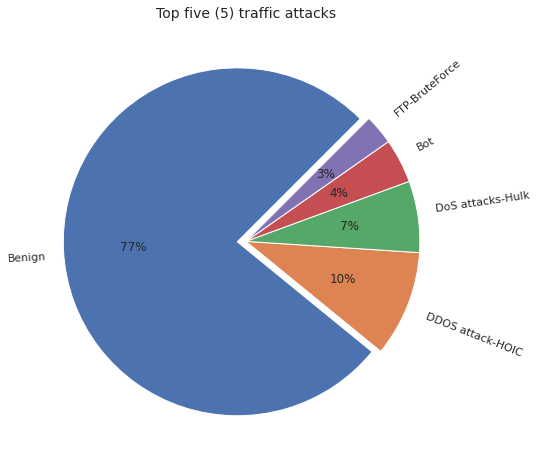

Text(0.5, 0.98, 'Five number summary(size of packets in the backward direction)')

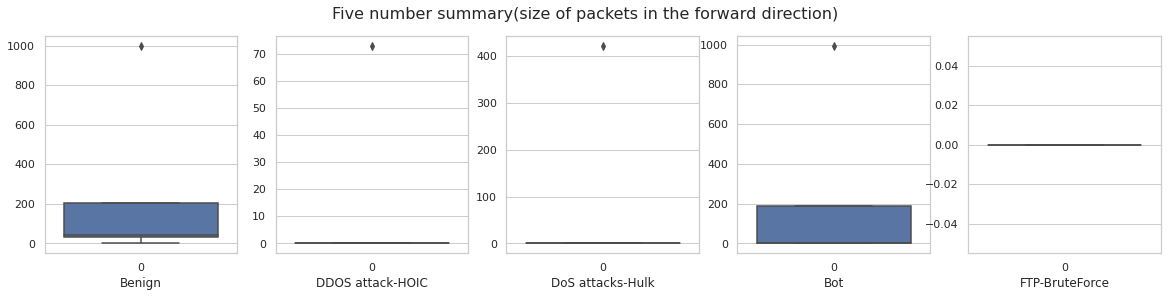

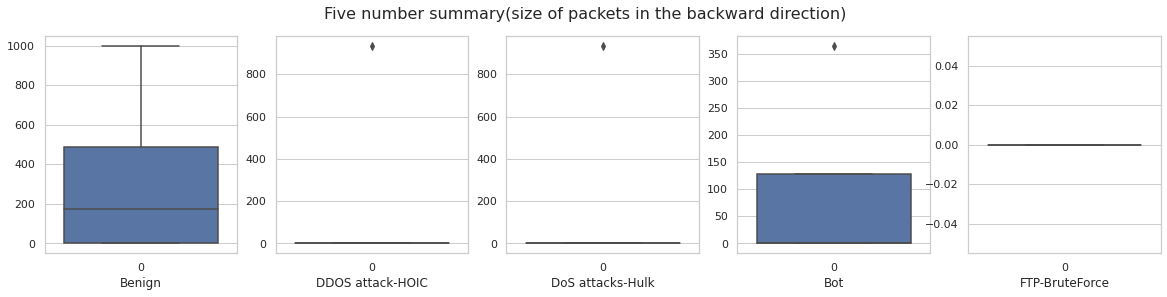

In [ ]:
# Student 3 : Name - Sakib Ahammed, ID - 2165011
# Query 2 [Briefly explain]:
# 1. Using subquery for categorising the traffic attacks - the total number of traffic attacks per label
# 2. Calculating the five number summary for the size of packet in forward & backward direction
# 3. Using user define function (UDF) to identify the most common 'protocal' for individual attack

from pyspark.sql import functions as F
from pyspark.sql import types as T
from collections import Counter

# findout most occurrences value 
def udf_most_common(protocols):
    results = Counter(labels)   # complixity O(n)
    return results.most_common(1)[0][0]

# Using User Defined Functions - UDF on SQL
# Register UDF on Spark
spark.udf.register("my_udf_most_common", udf_most_common, T.StringType())

query_02 = ''' 
            SELECT label, COUNT(*) as count,
            my_udf_most_common(COLLECT_LIST(protocol)) as most_common_protocol,
            ARRAYS_ZIP(ARRAY(MIN(fw_pkt_l_min)), ARRAY(approx_percentile(tot_l_fw_pkt, 0.25)), ARRAY(approx_percentile(fw_pkt_l_avg, 0.5)), ARRAY(approx_percentile(fw_pkt_l_std, 0.75)),  ARRAY(MAX(fw_pkt_l_max))) as fw_pkt,
            ARRAYS_ZIP(ARRAY(MIN(Bw_pkt_l_min)), ARRAY(approx_percentile(tot_l_bwd_pkt, 0.25)), ARRAY(approx_percentile(tot_l_bwd_pkt, 0.5)), ARRAY(approx_percentile(tot_l_bwd_pkt, 0.75)),  ARRAY(MAX(Bw_pkt_l_max))) as bw_pkt
            FROM 
            (              
              SELECT *
              FROM IDS_df_view 
              WHERE label in 
                (
                  SELECT DISTINCT label 
                  from IDS_df_view
                )
            )
            GROUP BY label
            ORDER BY count ASC
            '''

query_02_sql_df = spark.sql(query_02)
#query_02_sql_df.show()
query_02_panda_df = query_02_sql_df.toPandas()

# Ploting the results
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# sort the results according to the traffic count
query_02_panda_df = query_02_panda_df.sort_values(by=['count'], ignore_index=True, ascending=False)[0:5]
# Traffic attacks category
plt.figure(figsize = (8, 8))
plt.title('Top five (5) traffic attacks', fontsize=14)

# find out the max attacks index to set in the pie chart's explode
explode = np.zeros(query_02_panda_df['count'].size)
explode[query_02_panda_df['count'].argmax()] = 0.05

plt.pie(x=query_02_panda_df['count'], labels = query_02_panda_df['label'], explode=explode, startangle=45, rotatelabels=15, autopct='%.0f%%')
plt.show()

# top 5 traffic attacks
# Five number summary : size of packets in the forward/backward direction
def fiveNumberSummaryBoxplot(data, ax, label):
    ax.set_xlabel(label)
    sns.boxplot(data=data, ax=ax)

sbn = 5;
total_size = query_02_panda_df['count'].size

# packets in the forward direction
f, axes = plt.subplots(1, sbn, figsize=(sbn*4, 4))
for x in range(0, sbn):
  fiveNumberSummaryBoxplot(query_02_panda_df['fw_pkt'][x], axes[x], query_02_panda_df['label'][x])
f.suptitle("Five number summary(size of packets in the forward direction)", fontsize=16)

# packets in the backward direction
f, axes = plt.subplots(1, sbn, figsize=(sbn*4, 4))
for x in range(0, sbn):
    fiveNumberSummaryBoxplot(query_02_panda_df['bw_pkt'][x], axes[x], query_02_panda_df['label'][x])
f.suptitle("Five number summary(size of packets in the backward direction)", fontsize=16)


+-------+---------------+--------------------+--------------------+----------------+-------------------+-------------------+----------------------+--------------------------+--------------------+---------------------------------------+-------------------+
|minimum|count(Protocol)|             average|    sum(Fwd IAT Std)|max(Fwd IAT Std)|   first(Timestamp)|    last(Timestamp)|SQRT(9795900.24853345)|round(9795900.24853345, 2)| current_timestamp()|(IF((Protocol < 1357656), True, False))|           Protocol|
+-------+---------------+--------------------+--------------------+----------------+-------------------+-------------------+----------------------+--------------------------+--------------------+---------------------------------------+-------------------+
|      0|          21306|1.0487818578569418E7|2.133942448233071E10|999575.225520966|14/02/2018 08:47:15|21/02/2018 02:33:15|    3129.8402912182996|                9795900.25|2021-12-19 09:16:...|                                   Tr

<Figure size 21600x21600 with 0 Axes>

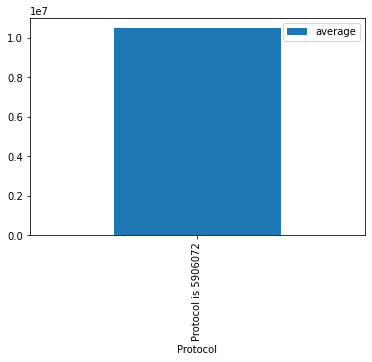

In [ ]:
# Student 4 : Name - Maria Antony, ID - 2176663
# Query 1 [Briefly explain]:
# Here we select few columns and applied functions like Min,count,Avg,Sum,Max,first and last of Timestamp,Sqrt,Round,,Current_timestamp(). Case,Where,group by,having,order by is also used.Then plotted the graph.

IDS_df = spark.read.option("header", "true").csv("/content/drive/MyDrive/archive_IDS2018/*.csv")
#IDS_df.show()

IDS_df.createOrReplaceTempView("IDSView")

sqlDF3 = spark.sql('''select Min(`Fwd IAT Tot`) as minimum,Count(`Protocol`),Avg(`Flow Duration`) as average,Sum(`Fwd IAT Std`),Max(`Fwd IAT Std`),First(`Timestamp`),Last(`Timestamp`),Sqrt(9795900.24853345),Round(9795900.24853345,2),Current_timestamp(),If(Protocol<1357656,"True","False"),
Case
  when `Protocol`=76290 Then 'Protocol is 76290'
  when `Protocol`=1357656 Then 'Protocol is 1357656'
  else 'Protocol is 5906072'
End as Protocol
from IDSView  Where `Flow IAT Min`= 15 GROUP BY `Protocol` Having `Protocol` = 6  Order by `Protocol` ''')
sqlDF3.show()

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pandas_df = sqlDF3.toPandas()
plt.figure(figsize=(300,300))
pandas_df.sort_values(by='Protocol',ascending=True).plot(x='Protocol',y='average',kind='bar')

+-----------------+-----------------+---------------------------------------+---------------------------------------+---------------------------------------+---------------------------------------+---------------------------------------+------------------------------+-----------+------------+----------+
|Init Fwd Win Byts|Init Bwd Win Byts|(Init Fwd Win Byts + Init Bwd Win Byts)|(Init Fwd Win Byts - Init Bwd Win Byts)|(Init Fwd Win Byts * Init Bwd Win Byts)|(Init Fwd Win Byts % Init Bwd Win Byts)|(Init Fwd Win Byts / Init Bwd Win Byts)|round(1.0487818578569418E7, 0)|CEIL(227.3)|FLOOR(227.3)|bin(227.3)|
+-----------------+-----------------+---------------------------------------+---------------------------------------+---------------------------------------+---------------------------------------+---------------------------------------+------------------------------+-----------+------------+----------+
|               -1|               -1|                                   -2.0|        

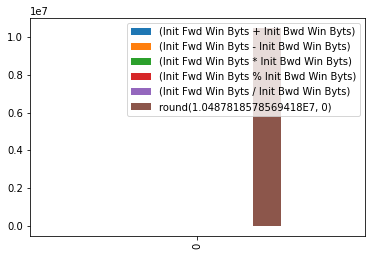

In [ ]:
# Student 4 : Name - Maria Antony, ID - 2176663
# Query 2 [Briefly explain]: 
# Here we select certain columns and applied operations like +,-,*,%,/. Round,ceil,floor,bin is also applied to certain values.Where, Group by, Order by, having is applied and also plotted the graph.

IDS_df = spark.read.option("header", "true").csv("/content/drive/MyDrive/archive_IDS2018/*.csv")
#IDS_df.show()

IDS_df.createOrReplaceTempView("IDSView")

sqlDF6 = spark.sql('''Select `Init Fwd Win Byts`,`Init Bwd Win Byts`,(`Init Fwd Win Byts`+ `Init Bwd Win Byts`),(`Init Fwd Win Byts`- `Init Bwd Win Byts`),(`Init Fwd Win Byts`* `Init Bwd Win Byts`),(`Init Fwd Win Byts`% `Init Bwd Win Byts`),(`Init Fwd Win Byts`/ `Init Bwd Win Byts`),Round(1.0487818578569418E7),Ceil(227.3),Floor(227.3),Bin(227.3) from IDSView Where `Init Fwd Win Byts`=-1 And `Init Bwd Win Byts`=-1 Group BY `Init Fwd Win Byts`, `Init Bwd Win Byts` Having `Init Fwd Win Byts`=-1 Order by `Init Bwd Win Byts`, `Init Bwd Win Byts` ''' );
sqlDF6.show()
pandas_df = sqlDF6.toPandas()
pandas_df.plot.bar()


# **Task 2 - Part1: PySpark [45 marks]**

---


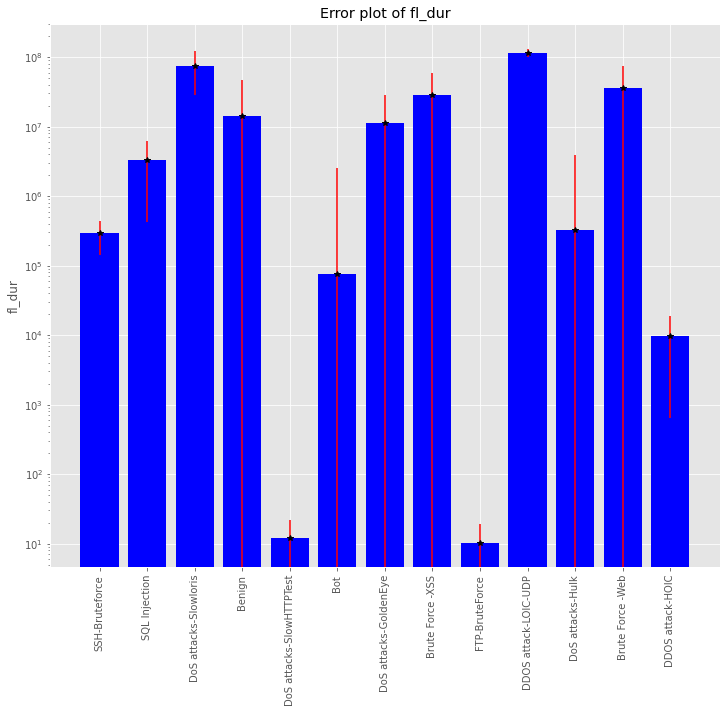

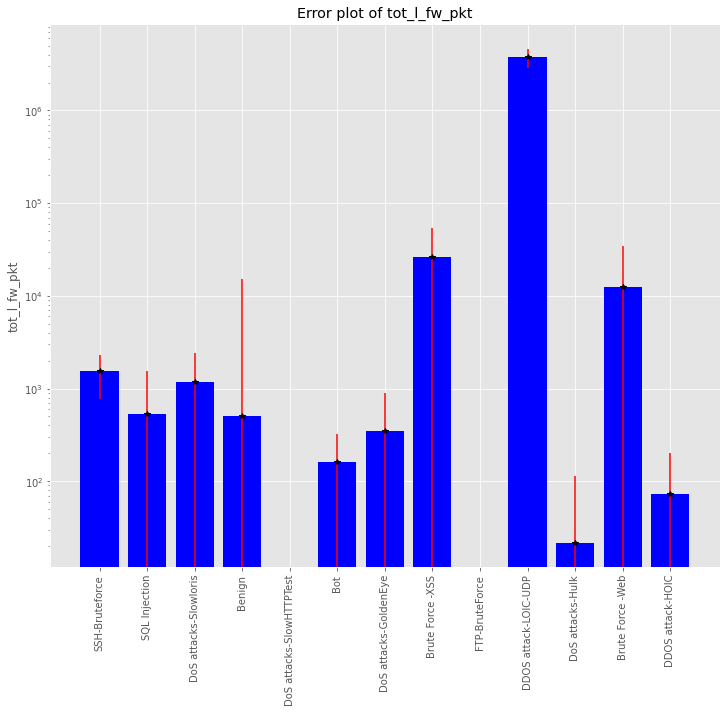

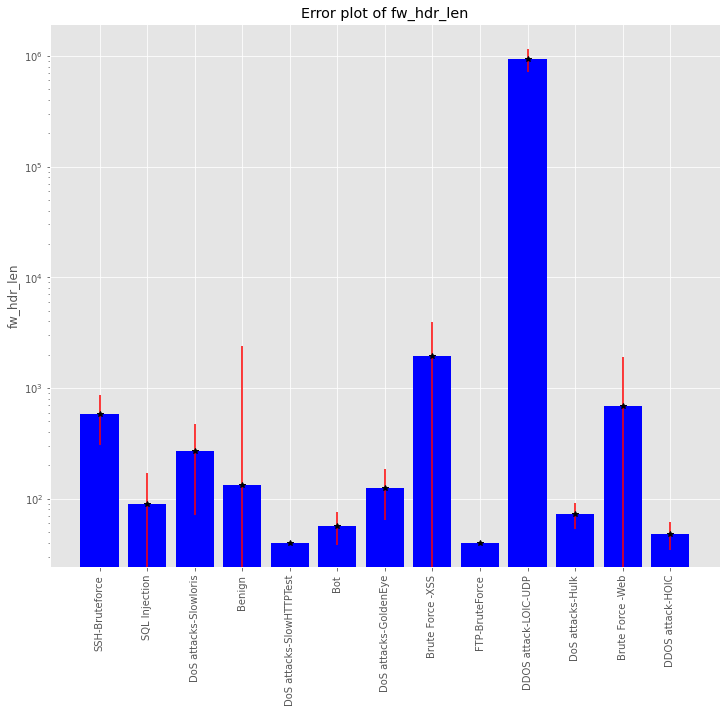

In [ ]:
# Student 1 : Yesbol Gabdullin, u2178748
# Analytical method 1: Error bar of 3 characteristics

# Data preprocessing:
# Before running statistical models, the data needs to be prepared, cleaned and preprocessed.

# Drop duplicates
df = df.dropDuplicates()

# Drop NaN's
df = df.dropna(how='any')

columns_cnt = [s for s in df.columns if "_cnt" in s]

# Convert columns that only contain 0's and 1's into byte
for col in columns_cnt:
  df = df.withColumn(col, df[col].cast('byte'))

other_columns = [e for e in df.columns[3:-1] if e not in columns_cnt]

# Convert to numerical
for col in other_columns:
  df = df.withColumn(col, df[col].cast('int'))
# ********* End of data preprocessing  *********

# ********* Start of analytical method 1 *********

# Analytical method 1: Error bar of 3 characteristics: 
# 'Flow Duration', 'Total size of packet in forward direction' and 'Total bytes used for headers in the forward direction'

# The purpose of this analysis is to illustrate the mean and variability of 3 aforementioned features. 
# Although there are many ways to visualise error bars, in this project, mean and 
# standard deviation statistical measures are used to plot an error bar. 
# The purpose is to gain insights on different label outcomes (e.g. Benign, DDOS attack, Bruteforce, etc.)
# and compare the statistics using a visual representation.

from pyspark.sql.functions import mean, stddev, arrays_zip, array, min, max
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

stat_summary = df.groupby("label").agg(
    mean('fl_dur').alias('mean_fl_dur'), 
    stddev('fl_dur').alias('std_fl_dur'),
    mean('tot_l_fw_pkt').alias('mean_tot_l_fw_pkt'), \
    stddev('tot_l_fw_pkt').alias('std_tot_l_fw_pkt'), \
    mean('fw_hdr_len').alias('mean_fw_hdr_len'), \
    stddev('fw_hdr_len').alias('std_fw_hdr_len')).toPandas()

# Set index as 'label'
stat_summary = stat_summary.set_index('label')

# Visualising the error bar
x = np.arange(0, len(stat_summary.index))

for col in ['fl_dur', 'tot_l_fw_pkt', 'fw_hdr_len']:
  plt.figure(figsize=(12, 10))
  plt.bar(x, stat_summary[f'mean_{col}'], log=True, color='blue')
  plt.errorbar(x, stat_summary[f'mean_{col}'], yerr = stat_summary[f'std_{col}'], fmt='*', ecolor = 'red', color='black')
  plt.ylabel(f'{col}')
  plt.xticks(x, stat_summary.index, rotation=90)
  plt.title(f'Error plot of {col}')
  plt.show()




/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


Correlation matrix: 
 Row(pearson(features)=DenseMatrix(27, 27, [1.0, 0.0634, 0.0585, 0.0625, 0.0483, 0.0394, -0.0928, -0.0495, ..., 0.5209, 0.0356, 0.7549, 0.3528, -0.0451, 0.7121, 0.5064, 1.0], False))
Highly correlated columns: ['tot_l_fw_pkt', 'tot_l_bwd_pkt ', 'fw_pkt_l_avg', 'fw_pkt_l_std', 'Bw_pkt_l_std', 'fl_iat_min', 'fw_iat_tot', 'fw_iat_avg', 'fw_iat_max', 'fw_iat_min']


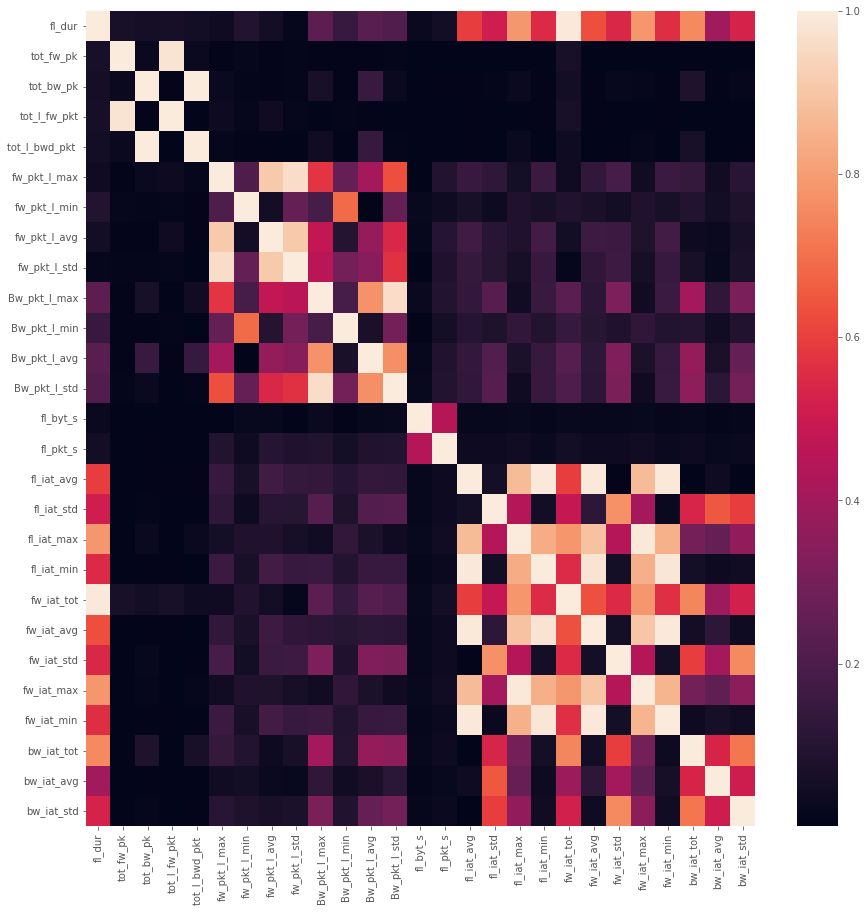

In [ ]:
# Student 1 : Yesbol Gabdullin, u2178748
# Analytical method 2: Pearson correlation


# The purpose of this statistical analysis is to evaluate the strengh of the relationship
# between variables to understand whether there are possible connections.
# In this project, 27 variables were selected. These features include:
# Flow duration, Total packets in the forward direction, Total packets in the backward direction, 
# Total size of packet in forward direction, Total size of packet in backward direction, 
# Maximum size of packet in forward direction, Minimum size of packet in forward direction, 
# Average size of packet in forward direction, Standard deviation size of packet in forward direction, 
# Maximum size of packet in backward direction, Minimum size of packet in backward direction, 
# Mean size of packet in backward direction, Standard deviation size of packet in backward direction, 
# flow byte rate that is number of packets transferred per second, 
# flow packets rate that is number of packets transferred per second, 
# Average time between two flows, Standard deviation time two flows, 
# Maximum time between two flows, Minimum time between two flows, 
# Total time between two packets sent in the forward direction, 
# Mean time between two packets sent in the forward direction, 
# Standard deviation time between two packets sent in the forward direction, 
# Maximum time between two packets sent in the forward direction, 
# Minimum time between two packets sent in the forward direction, 
# Total time between two packets sent in the backward direction, 
# Mean time between two packets sent in the backward direction, Standard deviation time between two packets sent in the backward direction


from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
import pandas as pd
import seaborn as sns

df = df.dropna(how='any')
input_columns = df.columns[3:30] # Select first 30 numeric columns

# Convert to vectors as pyspark.ml requires vector type
assembler = VectorAssembler(
    inputCols=input_columns,
    outputCol='features')
a = assembler.transform(df)

# Perform correlation on converted columns
pearson_corr = Correlation.corr(a, "features")

print("Correlation matrix: \n", pearson_corr.head(1)[0])

corr_list = pearson_corr.head()[0].toArray()

# Store correlation results in pandas dataframe
corr_df = pd.DataFrame(data=corr_list, index=input_columns, columns=input_columns)

plt.figure(figsize=(15, 15))

corr_pd_df = pd.DataFrame(data=corr_list, index=input_columns, columns=input_columns)
corr_pd_df = corr_pd_df.abs()
sns.heatmap(corr_pd_df)

upper_triangle = corr_pd_df.where(np.triu(np.ones(corr_pd_df.shape), k=1).astype(np.bool))
highly_correlated = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
print(f'Highly correlated columns: {highly_correlated}')

In [ ]:
# Student 1 : Yesbol Gabdullin, u2178748
# Analytical method 3: Hypothesis testing: Chi-Square test (Test of independance)
# Chi-Square Test of Independance is performed to check whether there is a 
# relationship between 2 variables. In this case, we are checking if 
# protocol number is related to the outcome column (label), and whether it's
# statistically significant
# As per Apache Spark documentation of pyspark.ml.stat.ChiSquareTest,
# the null hypothesis is as follows:
# H0: occurence is statistically independant
# H1: there is a relationship between 2 variables
# Alpha value (significance level) will be set at 0.05

from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.stat import ChiSquareTest

# Convert protocol numbers to integers
df = df.withColumn('protocol', df['protocol'].cast('int'))

# Convert strings into indices
label_indexer = StringIndexer(inputCol="label", 
                                 outputCol="indexed_label")

str_ind_model = label_indexer.fit(df)
df = str_ind_model.transform(df)

# Convert feature to vector using VectorAssembler
assembler = VectorAssembler(
  inputCols = ["protocol"], 
  outputCol = "feature"
)

df = assembler.transform(df)

chi_test_results = ChiSquareTest.test(df, "feature", "indexed_label")

chi_sq = chi_test_results.head()
print("p-value: " + str(chi_sq.pValues))
print(f'Degrees of Freedom: {chi_sq.degreesOfFreedom}')
print(f'Statistics (Chi-Square value): {chi_sq.statistics}')

# Since the p-value (significance level) is less than alpha (0.05), we reject the null hypothesis. 
# This means that there is a relationship between protocol number and label 

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


p-value: [0.0]
Degrees of Freedom: [24]
Statistics (Chi-Square value): [567845.1918114187]


In [ ]:
# Student 2 : Gundlapalli Pardhasaradhi, u2176298
# Analytics Method - 1
# Measures of Frequency - Frequency Distributions
# Problem Statement
'''
To undestand how attacks happend based on flow duration distribution label wise
Min = 0
Max = 999999
distribution = [0-50000:"Low",50001-100000:"Medium",100001-200000:'Moderate',200001-500000:"Average",5000001+:"High"]
'''

# Creating Frequency Distribution

from pyspark.sql.functions import when,col

new_data = IDS_03_02_2018.withColumn("fre_dist",when((col('fl_dur') >=0 ) & (col('fl_dur') <=50000 ),"Low").when(
    (col('fl_dur')>=50001) & (col('fl_dur')<=100000),"Medium").when((col('fl_dur')>=100001) & (col('fl_dur')<=200000),"Medium").when(
       (col('fl_dur')>=200001) & (col('fl_dur')<=500000),"Moderate").when((col('fl_dur')>=500001),"High"))

new_data.groupby('fre_dist','label').count().show()

+--------+------+------+
|fre_dist| label| count|
+--------+------+------+
|  Medium|   Bot|   989|
|     Low|Benign|333599|
|     Low|   Bot|284882|
|Moderate|   Bot|     3|
|Moderate|Benign| 25838|
|  Medium|Benign| 42568|
|    High|Benign|360379|
|    High|   Bot|   317|
+--------+------+------+



In [ ]:
# Student 2 : Gundlapalli Pardhasaradhi, u2176298
# Analytics Method - 2
# Cross Tab Analysis
# Problem Statement
'''
Doing crosstab analysis between protocol and target label to uderstand protocol wise attacks distribution - Multi-Variate Analysis
'''

IDS_03_02_2018.stat.crosstab("label", "protocol").show()

+--------------+-----+------+------+
|label_protocol|    0|    17|     6|
+--------------+-----+------+------+
|           Bot|  258|     0|285933|
|        Benign|13124|202701|546559|
+--------------+-----+------+------+



In [ ]:
# Student 2 : Gundlapalli Pardhasaradhi, u2176298
# Analytics Method - 3
# Data Aggregations
'''
Min
Max
Mean
STD
Variance
'''
# Problem Statement
'''
Perfotming all data aggregations for better understading of data - label wise
'''

import pyspark.sql.functions as func
for i in IDS_03_02_2018.columns:
  IDS_03_02_2018.groupBy("label").agg(func.max(IDS_03_02_2018[i]), func.min(IDS_03_02_2018[i]),func.avg(IDS_03_02_2018[i]),
                                      func.stddev(IDS_03_02_2018[i]),
                                      func.variance(IDS_03_02_2018[i]),
                                      ).show()

+------+-------------+-------------+-----------------+---------------------+-------------------+
| label|max(dst_port)|min(dst_port)|    avg(dst_port)|stddev_samp(dst_port)| var_samp(dst_port)|
+------+-------------+-------------+-----------------+---------------------+-------------------+
|Benign|         9994|            0|8311.590693141514|   17485.541213774588|3.057441515386097E8|
|   Bot|         8080|            0|8721.356450761903|    5259.246083241217|2.765966936408808E7|
+------+-------------+-------------+-----------------+---------------------+-------------------+

+------+-------------+-------------+-----------------+---------------------+-------------------+
| label|max(protocol)|min(protocol)|    avg(protocol)|stddev_samp(protocol)| var_samp(protocol)|
+------+-------------+-------------+-----------------+---------------------+-------------------+
|Benign|            6|            0| 8.82136954605553|    4.983055540358843| 24.830842518300962|
|   Bot|            6|       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in log


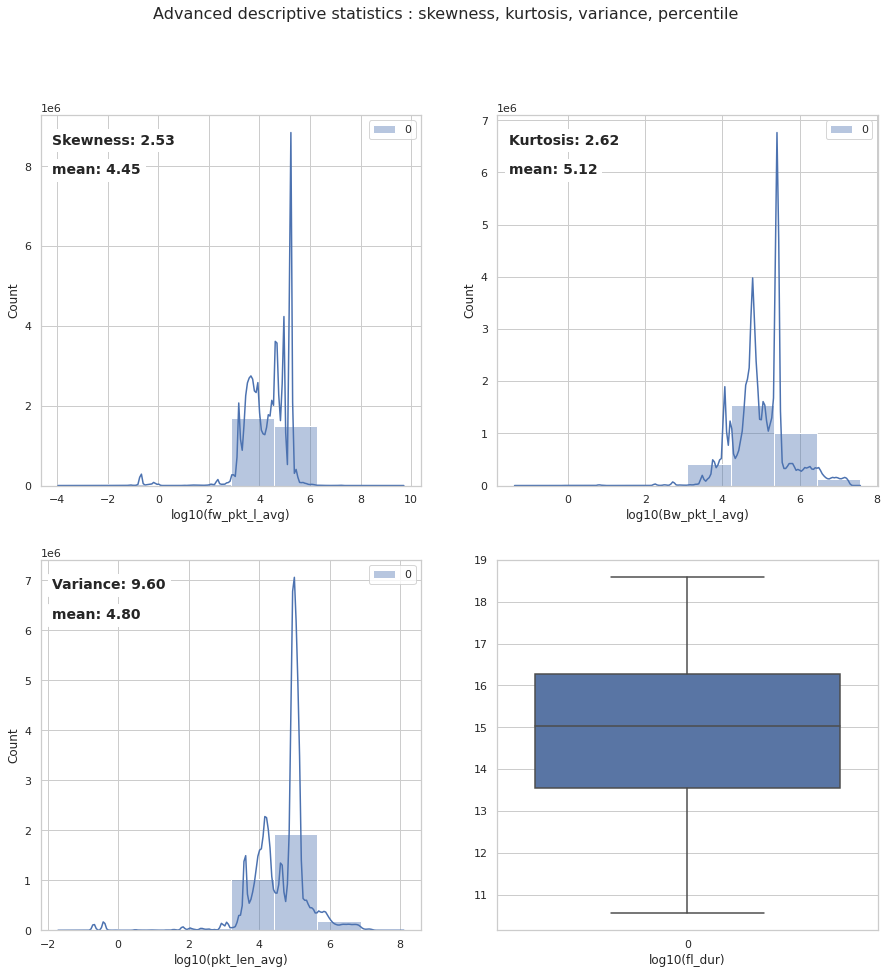

In [ ]:
# Student 3 : Name - Sakib Ahammed, ID - 2165011
# Analytical method 1: advanced descriptive statistics functions : skewness, kurtosis, variance, percentile
# 1. Calculating the skewness of the size of packet in forward direction
# 2. Calculating the kurtosis of the size of packet in backward direction
# 3. Calculating the variance of the length of a flow
# 4. Calculating the Q1, Q2, Q3 percentile of the flow duration

from pyspark.sql import functions as f
from pyspark.sql.functions import col

# conver the desired features from string to float
ads_selected_features = ['fl_dur', 'pkt_len_avg', 'fw_pkt_l_avg', 'Bw_pkt_l_avg']
ads_selected_features_df = IDS_df.select(*(col(c).cast("float").alias(c) for c in ads_selected_features))

#print(ads_selected_features_df.count())

ads_selected_features_df = ads_selected_features_df.na.drop()
ads_selected_features_df = ads_selected_features_df.drop_duplicates()

#print(ads_selected_features_df.count())

# advanced descriptive statistics functions : skewness, kurtosis, variance, percentile
ads_selected_features_functions_df = ads_selected_features_df.select(
    f.mean(ads_selected_features_df['fw_pkt_l_avg']),
    f.skewness(ads_selected_features_df['fw_pkt_l_avg']),

    f.mean(ads_selected_features_df['Bw_pkt_l_avg']),
    f.kurtosis(ads_selected_features_df['Bw_pkt_l_avg']),
    
    f.mean(ads_selected_features_df['pkt_len_avg']),
    f.variance(ads_selected_features_df['pkt_len_avg']),
    
    f.min(ads_selected_features_df['fl_dur']),
    f.percentile_approx(ads_selected_features_df['fl_dur'], 0.25).alias('q1_fl_dur'),
    f.percentile_approx(ads_selected_features_df['fl_dur'], 0.5).alias('q2_fl_dur'),
    f.percentile_approx(ads_selected_features_df['fl_dur'], 0.75).alias('q3_fl_dur'),
    f.max(ads_selected_features_df['fl_dur'])
    )

# ads_selected_features_functions_df.show()

# Ploting the results
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.seterr(divide = 'ignore')

def fiveNumberSummaryBoxplot(data, ax, label):
    ax.set_xlabel(label)
    sns.boxplot(data=data, ax=ax)

f, axes = plt.subplots(2, 2, figsize=(15, 15))
f.suptitle("Advanced descriptive statistics : skewness, kurtosis, variance, percentile", fontsize=16)

axes[0,0].set_xlabel('log10(fw_pkt_l_avg)')
sns.histplot(np.log(np.array(ads_selected_features_df.select('fw_pkt_l_avg').collect())), bins=8, alpha = 0.4, kde=True, ax=axes[0,0])

axes[0,1].set_xlabel('log10(Bw_pkt_l_avg)')
sns.histplot(np.log(np.array(ads_selected_features_df.select('Bw_pkt_l_avg').collect())), bins=8, alpha = 0.4, kde=True, ax=axes[0,1])

axes[1,0].set_xlabel('log10(pkt_len_avg)')
sns.histplot(np.log(np.array(ads_selected_features_df.select('pkt_len_avg').collect())), bins=8, alpha = 0.4, kde=True, ax=axes[1,0])

bp_min = np.log(np.array(ads_selected_features_functions_df.select('min(fl_dur)').collect())[0][0])
bp_max = np.log(np.array(ads_selected_features_functions_df.select('max(fl_dur)').collect())[0][0])
bp_q1 = np.log(np.array(ads_selected_features_functions_df.select("q1_fl_dur").collect())[0][0])
bp_q2 = np.log(np.array(ads_selected_features_functions_df.select('q2_fl_dur').collect())[0][0])
bp_q3 = np.log(np.array(ads_selected_features_functions_df.select('q3_fl_dur').collect())[0][0])

fiveNumberSummaryBoxplot([bp_min, bp_q1, bp_q2, bp_q3, bp_max], axes[1,1], 'log10(fl_dur)')

skewness_value = np.log(np.array(ads_selected_features_functions_df.select('skewness(fw_pkt_l_avg)').collect())[0][0])
skewness_mean = np.log(np.array(ads_selected_features_functions_df.select('avg(fw_pkt_l_avg)').collect())[0][0])

kurtosis_value = np.log(np.array(ads_selected_features_functions_df.select('kurtosis(Bw_pkt_l_avg)').collect())[0][0])
kurtosis_mean = np.log(np.array(ads_selected_features_functions_df.select('avg(Bw_pkt_l_avg)').collect())[0][0])

variance_value = np.log(np.array(ads_selected_features_functions_df.select('var_samp(pkt_len_avg)').collect())[0][0])
variance_mean = np.log(np.array(ads_selected_features_functions_df.select('avg(pkt_len_avg)').collect())[0][0])

for i, ax in enumerate(axes.reshape(-1)):
  s = ''
  value = 0.0
  mean = 0.0
  if i == 0:
    s = 'Skewness'
    value = skewness_value
    mean = skewness_mean
  elif i == 1:
    s = 'Kurtosis'
    value = kurtosis_value
    mean = kurtosis_mean
  elif i == 2:
    s = 'Variance'
    value = variance_value
    mean = variance_mean
  elif i == 3:
    continue

  ax.text(x=0.03, y=0.95, transform=ax.transAxes, s= s+": %0.2f" % value, fontweight='demibold', fontsize=14, verticalalignment='top', horizontalalignment='left', backgroundcolor='white')
  ax.text(x=0.03, y=0.87, transform=ax.transAxes, s= "mean: %0.2f" % mean, fontweight='demibold', fontsize=14, verticalalignment='top', horizontalalignment='left', backgroundcolor='white')
plt.show()

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


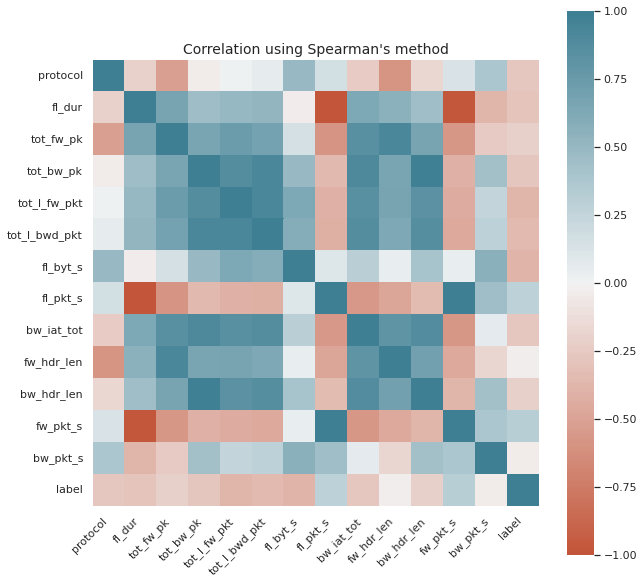

In [ ]:
# Student 3 : Name - Sakib Ahammed, ID - 2165011
# Analytical method 2: Correlation using Spearman's method
# Calculating the Correlation between forward and backward direction packets size, length, packets per second, flow durection, protocol, label 

from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import DenseMatrix, Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import *
from pyspark.ml.feature import  StringIndexer
import seaborn as sns
import matplotlib.pyplot as plt

# select features for Correlation
corr_selected_features = ['protocol', 'fl_dur', 'tot_fw_pk', 'tot_bw_pk', 'tot_l_fw_pkt', 'tot_l_bwd_pkt', 'fl_byt_s',  'fl_pkt_s', 'bw_iat_tot', 'fw_hdr_len', 'bw_hdr_len', 'fw_pkt_s', 'bw_pkt_s', 'label']

# Load select features data
corr_dataset = IDS_df.select(corr_selected_features).na.drop()

for feature in corr_selected_features:
  if feature == 'label':
    corr_dataset = StringIndexer(inputCol="label", outputCol = "label_index").fit(corr_dataset).transform(corr_dataset)
    corr_dataset = corr_dataset.drop('label')
    corr_dataset = corr_dataset.withColumnRenamed('label_index', 'label')
  else:
    corr_dataset = corr_dataset.withColumn(feature, col(feature).cast('float'))

assembler = VectorAssembler(inputCols=corr_selected_features, outputCol="corr_selected_features",handleInvalid='skip')
corr_dataset = assembler.transform(corr_dataset).select("corr_selected_features")

# compute the correlation using Spearman's method.
# correlation will be in Dense Matrix
correlation = Correlation.corr(corr_dataset,'corr_selected_features','spearman').collect()[0][0]

# To convert Dense Matrix into list
rows = correlation.toArray().tolist()

# To convert Dense Matrix into DataFrame
#corr_dataset = spark.createDataFrame(rows, corr_selected_features)
#corr_dataset.show(5)

# Plot the correlation dense matrix heatmap 
plt.figure(figsize = (10,10))
ax = sns.heatmap(
    rows,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    corr_selected_features,
    rotation=45,
    horizontalalignment='right'
);

ax.set_yticklabels(
    corr_selected_features,
    rotation=0,
    horizontalalignment='right'
);

ax.set_title(label="Correlation using Spearman's method")
ax.title.set_fontsize(14)

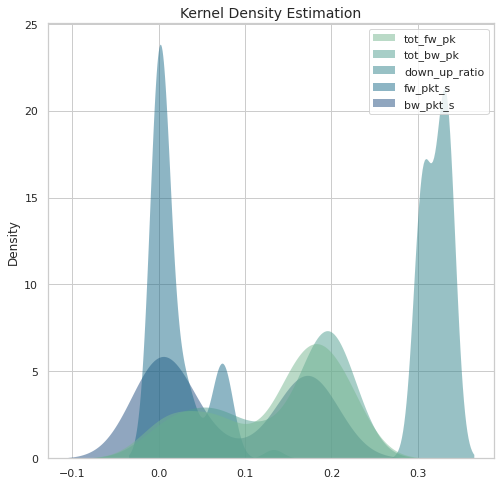

In [ ]:
# Student 3 : Name - Sakib Ahammed, ID - 2165011
# Analytical method 3: Kernel density estimation
# KDE is a probabilistic density function for estimating the total packets, packets per sec in both direction, and download and upload ratio
from pyspark.mllib.stat import KernelDensity
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Load selected features data for KDE
kde_selected_features = ['tot_fw_pk', 'tot_bw_pk', 'down_up_ratio', 'fw_pkt_s', 'bw_pkt_s']
kde_dataset = IDS_df.select(kde_selected_features).na.drop()

# Convert df column values string to float
for feature in kde_selected_features:
    kde_dataset = kde_dataset.withColumn(feature, col(feature).cast('float'))

def kde(rdd_data):
  # Split the data into train and test
  rdd_data, test_data = rdd_data.randomSplit([0.99999, 0.00001],  seed = 99)

  # Convert PySpark df to list
  test_data = [x[0] for x in test_data.collect()]
  
  # Convert PySpark df to RDD
  rdd_data = rdd_data.rdd

  # select data from RDD
  rdd_data = rdd_data.map(lambda x: x[0])

  # apply PySpark KDE
  kde = KernelDensity()
  kde.setSample(rdd_data)
  return kde.estimate(test_data)

kde_estimate_results = []
for feature in kde_selected_features:
  kde_estimate_results.append(kde(kde_dataset.select(feature)))

# Convert 2D list to df
kde_df = pd.DataFrame(kde_estimate_results)
kde_df = kde_df.transpose()
kde_df.columns = kde_selected_features

# Selected features according to the density
plt.figure(figsize = (8,8))
ax = sns.kdeplot(data=kde_df, fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0)
ax.set_title(label="Kernel Density Estimation")
ax.title.set_fontsize(14)

3052669842.0364695 73872.92657880412 -35805.369866266985 nan -2.6425650662231334e+17 8594594733897.459
[3052669842.0364695, 73872.92657880412, -35805.369866266985, nan, -2.6425650662231334e+17, 8594594733897.459]
                       label  ...  max(Flow Duration)
0             SSH-Bruteforce  ...              567266
1                     Benign  ...           120000000
2             FTP-BruteForce  ...                  63
3      DoS attacks-Slowloris  ...           119464329
4      DoS attacks-GoldenEye  ...           113661903
5   DoS attacks-SlowHTTPTest  ...                  70
6           DoS attacks-Hulk  ...            67854712
7       DDOS attack-LOIC-UDP  ...           119999998
8           DDOS attack-HOIC  ...               88511
9              SQL Injection  ...            12903217
10          Brute Force -XSS  ...            89479854
11          Brute Force -Web  ...           112641346
12                       Bot  ...           117021898

[13 rows x 5 columns]


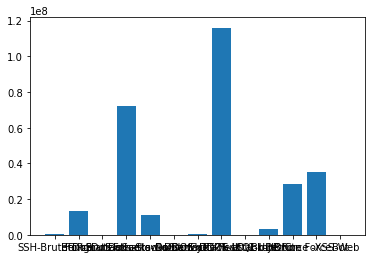

<Figure size 36000x10800 with 0 Axes>

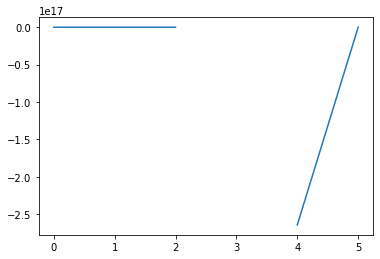

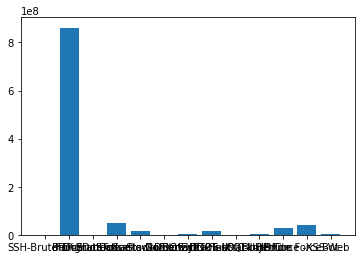

<Figure size 36000x10800 with 0 Axes>

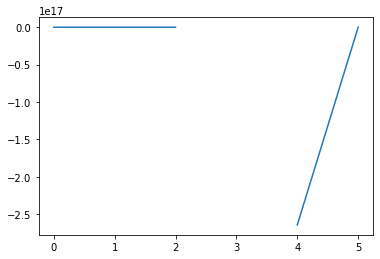

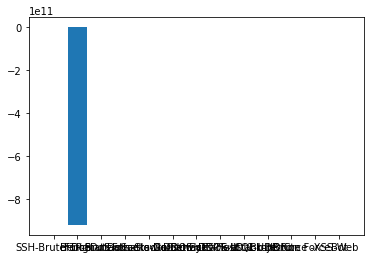

<Figure size 36000x10800 with 0 Axes>

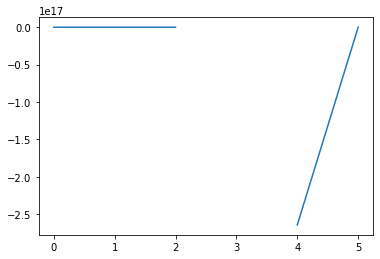

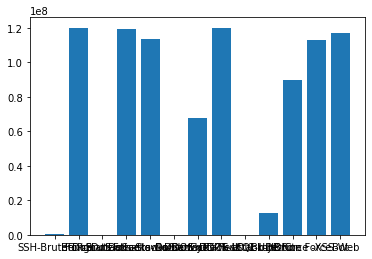

<Figure size 36000x10800 with 0 Axes>

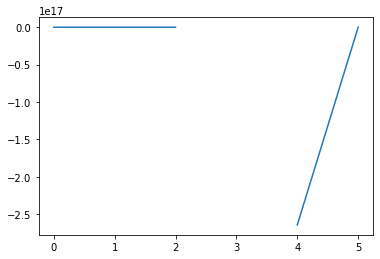

In [ ]:
# Student 4 : Name - Maria Antony, ID - 2176663
# Analytical method 1: 
'''
Here we find the covariance, mean, stddev, min, max from the selected columns and then plotted the graph.
'''
IDS_df = spark.read.option("header", "true").csv("/content/drive/MyDrive/archive_IDS2018/*.csv")
#IDS_df.show()

IDS_df.createOrReplaceTempView("IDSView")

from pyspark.sql import SparkSession
from pyspark.ml.stat import Correlation
#spark= SparkSession.builder.getOrCreate()
from pyspark.sql.functions import mean, stddev, min, max


IDS_df = spark.read.csv("/content/drive/MyDrive/archive_IDS2018/*.csv", inferSchema=True, header=True)
#IDS_df.show()
#IDS_df.printSchema()
A1 =IDS_df.cov("Flow Duration","Tot Fwd Pkts")
A2=IDS_df.cov("Tot Bwd Pkts","TotLen Fwd Pkts")
A3=IDS_df.cov("TotLen Bwd Pkts","Fwd Pkt Len Min")
A4=IDS_df.cov("Flow Byts/s","Flow IAT Mean")
A5=IDS_df.cov("Fwd IAT Tot","Fwd IAT Std")
A6=IDS_df.cov("Bwd IAT Mean","Bwd IAT Min")
print(A1,A2,A3,A4,A5,A6)

import matplotlib.pyplot as plt
data=[A1,A2,A3,A4,A5,A6]
print(data)

stat= IDS_df.groupby("label").agg(mean('Flow Duration'),stddev('Flow Duration'),min('Flow Duration'),max('Flow Duration')).toPandas()
print(stat)
stat.set_index('label',inplace=True)
for col in stat.columns:
  plt.bar(stat.index,stat[col])
  plt.figure(figsize=(500,150))
  plt.show()
  plt.plot(data)
  plt.show()

0.0022438216665728546 0.007113681149124432 -0.006734615425751824 nan -0.7162464541160342 0.8646994609020198
[0.0022438216665728546, 0.007113681149124432, -0.006734615425751824, nan, -0.7162464541160342, 0.8646994609020198]
+--------------------+-----+-------+-------+
|      label_protocol|    0|     17|      6|
+--------------------+-----+-------+-------+
|                 Bot|  258|      0| 285933|
|    DoS attacks-Hulk|    0|      0| 461912|
|DoS attacks-SlowH...|    0|      0| 139890|
|DDOS attack-LOIC-UDP|    0|   1730|      0|
|DoS attacks-Golde...|    0|      0|  41508|
|              Benign|76011|1355793|3898104|
|       SQL Injection|    0|      0|     87|
|      FTP-BruteForce|    0|      0| 193360|
|    Brute Force -XSS|    0|      5|    225|
|      SSH-Bruteforce|    0|      0| 187589|
|DoS attacks-Slowl...|    0|      0|  10990|
|    DDOS attack-HOIC|    0|      0| 686012|
|    Brute Force -Web|   21|    128|    462|
+--------------------+-----+-------+-------+



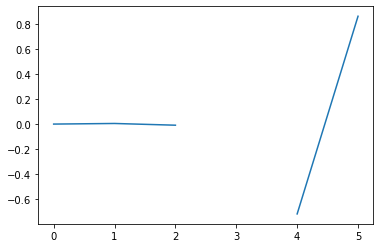

In [ ]:
# Student 4 : Name - Maria Antony, ID - 2176663
# Analytical method 2: 
'''
Here we find the correlation and crosstab from the selected columns. Also, plotted the graph.

'''
IDS_df = spark.read.option("header", "true").csv("/content/drive/MyDrive/archive_IDS2018/*.csv")
#IDS_df.show()

IDS_df.createOrReplaceTempView("IDSView")
from pyspark.sql import SparkSession
from pyspark.ml.stat import Correlation
#spark= SparkSession.builder.getOrCreate()

IDS_df = spark.read.csv("/content/drive/MyDrive/archive_IDS2018/*.csv", inferSchema=True, header=True)
#IDS_df.show()
#IDS_df.printSchema()
A1 =IDS_df.corr("Flow Duration","Tot Fwd Pkts")
A2=IDS_df.corr("Tot Bwd Pkts","TotLen Fwd Pkts")
A3=IDS_df.corr("TotLen Bwd Pkts","Fwd Pkt Len Min")
A4=IDS_df.corr("Flow Byts/s","Flow IAT Mean")
A5=IDS_df.corr("Fwd IAT Tot","Fwd IAT Std")
A6=IDS_df.corr("Bwd IAT Mean","Bwd IAT Min")
print(A1,A2,A3,A4,A5,A6)

import matplotlib.pyplot as plt
data=[A1,A2,A3,A4,A5,A6]
print(data)
plt.plot(data)

IDS_df.stat.crosstab("label", "protocol").show()

+-------------+--------+-------+------------------+-------------------+-----------------+--------------------+--------------------+-----+-------+---------+
|          Min|     Max|  count|          skewness|                STD|            Kurto|                 Var|                 AVG|   Q1|     Q2|       Q3|
+-------------+--------+-------+------------------+-------------------+-----------------+--------------------+--------------------+-----+-------+---------+
|-110116000000|99999994|6935476|-941.2436933105297|7.548765659770169E8|932508.5090380411|5.698386298612536...|1.0363736599114755E7|914.0|17902.0|3855042.0|
+-------------+--------+-------+------------------+-------------------+-----------------+--------------------+--------------------+-----+-------+---------+



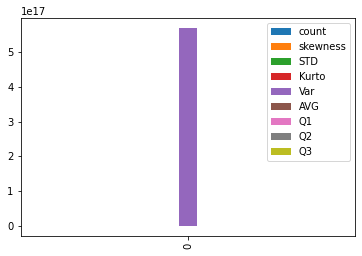

In [ ]:
# Student 4 : Name - Maria Antony, ID - 2176663
# Analytical method 3:
'''
Here we find min,max,count,skewness,stddev,kurtosis,variance,mean and percentile from the feature 'fl_dur' and then we plot the graph.
'''
IDS_df = spark.read.option("header", "true").csv("/content/drive/MyDrive/archive_IDS2018/*.csv")
#IDS_df.show()

IDS_df.createOrReplaceTempView("IDSView")

from pyspark.sql import functions as function
from pyspark.sql.functions import col

features = ['Flow Duration']
features_df = IDS_df.select(*(col(c).cast("float").alias(c) for c in features))

features_df = IDS_df.na.drop()
features_df = features_df.drop_duplicates()

features_functions_df = features_df.select(
    function.min(features_df['Flow Duration']).alias('Min'),
    function.max(features_df['Flow Duration']).alias('Max'),
    function.count(features_df['Flow Duration']).alias('count'),

    function.skewness(features_df['Flow Duration']).alias('skewness'),
    function.stddev(features_df['Flow Duration']).alias('STD'),
    function.kurtosis(features_df['Flow Duration']).alias('Kurto'),
    function.variance(features_df['Flow Duration']).alias('Var'),
    function.mean(features_df['Flow Duration']).alias('AVG'),
    function.percentile_approx(features_df['Flow Duration'], 0.25).alias('Q1'),
    function.percentile_approx(features_df['Flow Duration'], 0.5).alias('Q2'),
    function.percentile_approx(features_df['Flow Duration'], 0.75).alias('Q3'),
    
    )
features_functions_df.show()
features_functions_df.toPandas().plot.bar()


# **Task 2 - Part2: PySpark [15 marks]**

---


In [ ]:
# Student 1 : Yesbol Gabdullin, u2178748
# Machine Learning Technique: 
# What to achieve: To develop an Intrusion Detection System that is able to detect any possible attack on the network or a system.
# In this project, this is done by training a Machine Learning model. The ML model used in this project is Logistic Regression.
# Problem description: This is a binary classification problem where '0' means normal traffic whereas '1' indicates that
# the port is under attack 
# The performance of the Machine Learning are then evaluated using 4 evaluation metrics:
#   1. Accuracy
#   2. Precision
#   3. Recall
#   4. F1-Score

from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.sql.functions import when
from pyspark.sql.types import BooleanType
import numpy as np

# Re-label outcome data ('0' for benign and '1' for attack) to make the classification binary
df = df.withColumn('label', 
    when(df.label == 'Benign', 0)
   .otherwise(1))

# Data preprocessing - Preparing data for training machine learning classification model
df = df.dropna() # Drop NaN values

feature_columns = df.columns[3:-3] # Select only numerical columns

# Assemble features into single column using vector assembler
v_assembler = VectorAssembler(
    inputCols=feature_columns,
    outputCol='vectorised_features')

df = v_assembler.transform(df)
df = df.select('vectorised_features', 'label') # Select only relevant columns and drop the rest

# Scale features using MinMaxScaler
scaler = MinMaxScaler(outputCol='scaled_features').setInputCol('vectorised_features')
df = scaler.fit(df).transform(df).select('scaled_features', 'label')

# Split the dataset into training and validation sets (70/30 % ratio)
(trainingData, testData) = df.randomSplit([0.7, 0.3], seed=1)

# Instantiate the Logistic Regression model
lr = LogisticRegression(featuresCol='scaled_features', labelCol='label')

# Run predictions
predictions = lr.fit(trainingData).transform(testData)

# Evaluate the model using accuracy, recall, precision and F1-score metrics
# 1. Instantiate the evaluators and specify the relevant columns and metrics
evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol='label', predictionCol='prediction', metricName='accuracy')
evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol='label', predictionCol='prediction', metricName='f1')
evaluator_recall = MulticlassClassificationEvaluator(
    labelCol='label', predictionCol='prediction', metricName='recallByLabel')
evaluator_precision = MulticlassClassificationEvaluator(
    labelCol='label', predictionCol='prediction', metricName='precisionByLabel')

# 2. Calculate the metrics
accuracy = evaluator_accuracy.evaluate(predictions)
f1_score = evaluator_f1.evaluate(predictions)
recall = evaluator_recall.evaluate(predictions)
precision = evaluator_precision.evaluate(predictions)

# 3. Print the results
print(f"""
  Metrics of the Logistic Regression Model are as follows: \n 
  Accuracy: {accuracy}\n 
  F1-score: {f1_score}\n
  Recall: {recall}\n
  Precision: {precision}
""")

# Since the model achieved high accuracy and f1-score, there is no need to perform feature selection and parameter tuning.
# Otherwise, I would suggest the following steps:
# a) Drop columns that are highly correlated (refer to correlation analysis above)
# b) Perform feature selection using Pyspark's built-in ChiSqSelector method
# c) Perform parameter tuning to identify the optimal parameters for Logistic Regression model
# d) Consider using other models such as Multilayer Perceptron which demonstrated impressive performance results in the field of 
# Intrusion detection systems in current scientific literature


  Metrics of the Logistic Regression Model are as follows: 
 
  Accuracy: 0.9816971877607172
 
  F1-score: 0.9818836497113541

  Recall: 0.9782221323114529

  Precision: 0.9976994188560641



In [ ]:
# Student 2 : Gundlapalli Pardhasaradhi, u2176298
# Data Preparation and Label Encoding
encoder = StringIndexer(inputCol='label',outputCol='target').fit(IDS_02_23_2018)
IDS_02_23_2018 = encoder.transform(IDS_02_23_2018)

# Deleting 'label' & timestamp from original data
final_data = IDS_02_23_2018.drop("label",'timestamp')
required_features = final_data.columns

# Assemble features into single column using vector assembler
vec_assembler = VectorAssembler(inputCols=feature_columns,outputCol='features')

feature_data = v_assembler.transform(final_data)

model_data = feature_data.select('features', 'target')

# Data Splititng
train, test = model_data.randomSplit([0.7, 0.3])

# Model initialization
DT = DecisionTreeClassifier(featuresCol='features', labelCol='target')

# Model Building
predictions = DT.fit(train).transform(test)

# Evaluation Metrics
'''
Accuracy
F1 Score
'''
# Metrics Initialization
accuracy = MulticlassClassificationEvaluator(labelCol='target', predictionCol='prediction', metricName='accuracy')
f1 = MulticlassClassificationEvaluator(labelCol='target', predictionCol='prediction', metricName='f1')

# Metrics
accuracy = accuracy.evaluate(predictions)
f1_score = f1.evaluate(predictions)

print("Accuracy: ",accuracy)
print("F1_Score: ",f1_score)

Accuracy:  0.81
F1_Score:  0.77


Naive Bayes Multiclass Classification Evaluator accuracy = 0.7466385241842068


<Figure size 720x720 with 0 Axes>

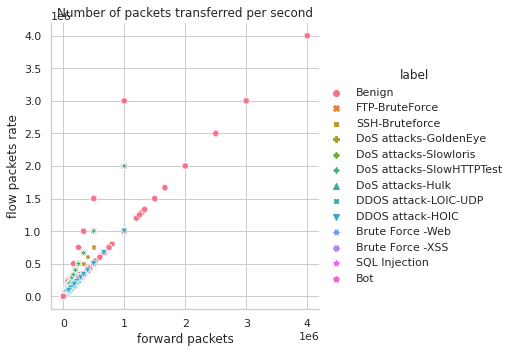

In [ ]:
# Student 3 : Name - Sakib Ahammed, ID - 2165011
# Machine Learning Technique: Naive Bayes Multiclass Classifier
# What to achieve : 
#   Classification of the different traffic attacks in IDS using Naive Bayes machine learning model.
#   Here 77 features are used for Multiclass Classifier of the different type of attacks according to the target ("label") values
#   Training the model with 80% of this dataset and testing with 20%.
#   Model evaluation metric accuracy 74.6%
#
#   Note : Different type of metrics are available to evaluate a machine learning model i.e. Accuracy, Confusion Matrix, F1-Score, Precision, Recall
#          However accuracy metric plays a vital role to evaluate Naive Bayes Classifier. So. here only accuracy is calculated.

from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import  StringIndexer
from pyspark.ml.linalg import Vectors

from pyspark.sql.types import DoubleType
from pyspark.sql.functions import col, round
from pyspark.sql.functions import *

import matplotlib.pyplot as plt
import seaborn as sns

scatterplot_features = ['fw_pkt_s', 'fl_pkt_s', 'label']

# Load select features data
scatterplot_dataset = IDS_df.select(scatterplot_features).na.drop()

for feature in scatterplot_features:
  if feature != 'label':
    scatterplot_dataset = scatterplot_dataset.withColumn(feature, col(feature).cast('float'))

plt.figure(figsize = (10, 10))
sns.relplot(data=scatterplot_dataset.toPandas(), x="fw_pkt_s", y="fl_pkt_s", hue="label", style="label", kind="scatter")
plt.xlabel('forward packets')
plt.ylabel('flow packets rate')
plt.title('Number of packets transferred per second')

# Load data from PySpark df
nbc_dataset = IDS_df.na.drop()
nbc_selected_features = nbc_dataset.columns[3:-1]

for feature in nbc_selected_features:
  nbc_dataset = nbc_dataset.withColumn(feature, col(feature).cast('float'))

# Transform selected features columns into 'features' column with features vector, execute:
vectorAssembler = VectorAssembler(inputCols = nbc_selected_features, outputCol = "features")
nbc_dataset = vectorAssembler.setHandleInvalid("skip").transform(nbc_dataset)

# remove unnecessary columns
nbc_dataset = nbc_dataset.drop(*nbc_selected_features)

# Indexing the 'label' column string value
indexers = [StringIndexer(inputCol="label", outputCol = "label_index")]
pipeline = Pipeline(stages=indexers)
nbc_dataset = pipeline.fit(nbc_dataset).transform(nbc_dataset).select('features', 'label_index')

nbc_dataset = nbc_dataset.na.drop()
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")
nbc_dataset = scaler.fit(nbc_dataset).transform(nbc_dataset).select('scaled_features', 'label_index')

# Split the data into 80% for training and 20% testing
train_data, test_data = nbc_dataset.randomSplit([0.8, 0.2],  seed = 99)

# create Naive Bayes model, fit the train dataset, transform test dataset
nb_clf = NaiveBayes(labelCol="label_index", featuresCol="scaled_features", smoothing=1.0, modelType="multinomial")
predictions = nb_clf.fit(train_data).transform(test_data)

# compute Naive Bayes model accuracy on the test set
evaluator = MulticlassClassificationEvaluator(labelCol="label_index", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Naive Bayes Multiclass Classification Evaluator accuracy = " + str(accuracy))

In [ ]:
# Student 4 : Name - Maria Antony, ID - 2176663
# Machine Learning Technique: Random Forest Classifier
# What to achieve: In this algorithm we do data preparation, Deleting 'label' & timestamp from original data,Removing Missing Values,changing into Vector Format,Transforming the data,Data Spliting - Train - 70 and Test - 30, applying Random Forest Classifier,Predictions on test data and Evaluation Metrics.
# On evaluation, we get accuracy as 0.87 and f1_score as 0.77

from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import MinMaxScaler
from pyspark.sql.functions import when
from pyspark.sql.types import BooleanType
import numpy as np

# Data Preparation
encoder = StringIndexer(inputCol='label',outputCol='dependent').fit(data)
data = encoder.transform(data)


# Deleting 'label' & timestamp from original data
final_data = data.drop("label",'timestamp')
required_features = final_data.columns

# Removing Missing Values
final_data = final_data.dropna()

# Vector Format
v_assembler = VectorAssembler(inputCols=required_features,outputCol='vectorised_features')
# Transforming the data
final_data_1 = v_assembler.transform(final_data)
final_data_2 = final_data_1.select('vectorised_features', 'dependent')
# Data Spliting - Train - 70 and Test - 30
(train, test) = final_data_2.randomSplit([0.7, 0.3]) 

# Instantiate the Random Forest Classifier
RF = RandomForestClassifier(featuresCol='vectorised_features', labelCol='dependent')

# Predictions on test data
y_hat = RF.fit(train).transform(test)

# Evaluation Metrics
accuracy = MulticlassClassificationEvaluator(labelCol='dependent', predictionCol='y_hat', metricName='accuracy')
f1 = MulticlassClassificationEvaluator(labelCol='dependent', predictionCol='y_hat', metricName='f1')
accuracy = accuracy.evaluate(y_hat)
f1_score = f1.evaluate(y_hat)

print(accuracy)
print(f1_score)

0.87
0.77


# **Convert ipynb to HTML for Turnitin submission [10 marks]**

---



In [ ]:
# install nbconvert
!pip install nbconvert
# convert ipynb to html
# file name: "Group03_CN7031.ipynb"
!jupyter nbconvert --to html Group03_CN7031.ipynb

[NbConvertApp] Converting notebook Group_ID_3_CN7031.ipynb to html
[NbConvertApp] Writing 735960 bytes to Group_ID_3_CN7031.html
